# EXAM PRACTICE

Exercise 1

• Use SecML to fit a Gaussian SVM on the provided dataset.


• Use SecML to compute the accuracy on the test set.


• Display the decision function of the classifier, along with the training samples.

In [1]:
try:
    import secml
except ImportError:
    %pip install git+https://github.com/pralab/secml
    %pip install foolbox

  Cloning https://github.com/pralab/secml to /tmp/pip-req-build-d_wtffou
  Running command git clone --filter=blob:none --quiet https://github.com/pralab/secml /tmp/pip-req-build-d_wtffou
  Resolved https://github.com/pralab/secml to commit e7463f2114ddf507a32a74c80e401574d7d9e086
  Preparing metadata (setup.py) ... done
  Created wheel for secml: filename=secml-0.15.6-py3-none-any.whl size=463965 sha256=a2a82b19dc8e10bd049f6d146ae38916066b3316c7323b869b678518e0616b6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-hhd8kqq0/wheels/22/d7/97/6c54183f8e63358a946e938cc5ca912832afe4a0b9d9b3d736
Successfully built secml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [2]:
# --- Import all necessary libraries
from secml.data.splitter import CTrainTestSplit
from secml.data.loader import CDLRandomBlobs
from secml.ml.features import CNormalizerMinMax
from secml.figure import CFigure
from secml.array import CArray
from secml.ml.classifiers import CClassifierSVM
#from secml.ml.classifiers import CClassifierLinear
from secml.ml.classifiers.loss import CLossCrossEntropy
from sklearn.svm import SVC
from secml.ml.kernels import CKernelRBF
from secml.ml.classifiers import CClassifierSkLearn
from secml.ml.peval.metrics import CMetricAccuracy
from secml.adv.attacks.evasion import CFoolboxPGDLinf

2023-12-19 16:37:32,895 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data
2023-12-19 16:37:32,895 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data


INFO:secml.settings:New `SECML_HOME_DIR` created: /root/secml-data


2023-12-19 16:37:32,912 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf
2023-12-19 16:37:32,912 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf


INFO:secml.settings:Default configuration file copied to: /root/secml-data/secml.conf


2023-12-19 16:37:32,922 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets
2023-12-19 16:37:32,922 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets


INFO:secml.settings:New `SECML_DS_DIR` created: /root/secml-data/datasets


2023-12-19 16:37:32,931 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models
2023-12-19 16:37:32,931 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models


INFO:secml.settings:New `SECML_MODELS_DIR` created: /root/secml-data/models


2023-12-19 16:37:32,940 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments
2023-12-19 16:37:32,940 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments


INFO:secml.settings:New `SECML_EXP_DIR` created: /root/secml-data/experiments


2023-12-19 16:37:32,986 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs
2023-12-19 16:37:32,986 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs


INFO:secml.settings:New `SECML_LOGS_DIR` created: /root/secml-data/logs


2023-12-19 16:37:33,007 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data
2023-12-19 16:37:33,007 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


INFO:secml.settings:New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


In [3]:
# --- Define constants for dataset creation

random_state = 444
n_features = 2
centers = [[2, -2], [2, 2], [-2, 0]]
cluster_std = 0.6
n_classes = len(centers)
n_tr = 1000
n_ts = 100
n_samples = n_ts + n_tr

# ---- Create and load the dataset
dataset = CDLRandomBlobs(n_features=n_features,
                         centers=centers,
                         cluster_std=cluster_std,
                         n_samples=n_samples,
                         random_state=random_state).load()

In [4]:
# --- Split data

splitter = CTrainTestSplit(train_size=n_tr, test_size=n_ts, random_state=random_state)
tr, ts = splitter.split(dataset)

# --- Normalize data

nmz = CNormalizerMinMax()
#tr.X = nmz.fit_transform(tr.X)
#ts.X = nmz.fit_transform(ts.X)

tr.X = nmz.fit(dataset.X).transform(tr.X)
ts.X = nmz.transform(ts.X)

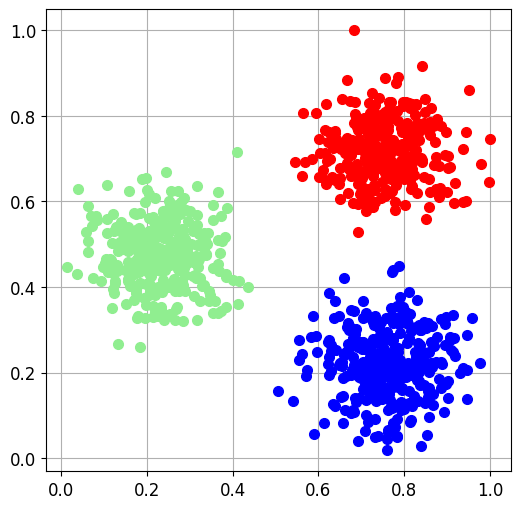

In [14]:
# --- Visualization of the dataset

fig = CFigure(width=6, height=6)
fig.sp.plot_ds(tr)
fig.show()

In [ ]:
# --- Exercise 1 (6 Points)

# Complete the following tasks using SecML:
# * Fit a SVM using the ad-hoc SecML class on the provided training set, with default hyperparameters
# * Compute the accuracy on the test set using the CMetricAccuracy object
# * Plot the learned decision function using the ad-hoc method of the CFigure class

In [15]:
# --- Fit the model

model = CKernelRBF()
#model =
#clf = CClassifierSkLearn(model) sklearn classifier
clf = CClassifierSVM(kernel=model)
#clf = CClassifierLinear()
clf.fit(tr.X, tr.Y)

# --- Accuracy on the test set
metric = CMetricAccuracy()
yp = clf.predict(ts.X)
print('Acuracy on on the test:', metric.performance_score(ts.Y, yp))


Acuracy on on the test: 1.0


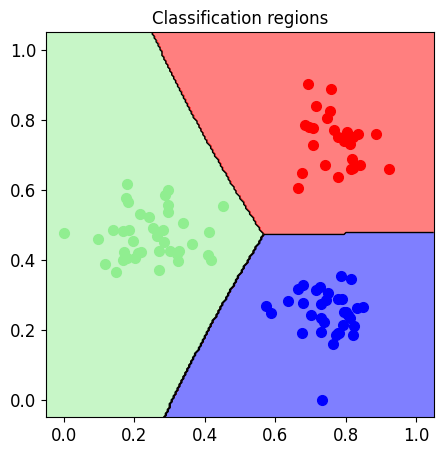

In [16]:

# Plot of the learned regions

%matplotlib inline
fig = CFigure(width=5, height=5)
fig.sp.plot_decision_regions(clf, n_grid_points=200)

fig.sp.plot_ds(ts)
fig.sp.grid(grid_on=False)

fig.sp.title("Classification regions")
fig.show()

In [ ]:
# Exercise 2 (10 Points)
#
# Compute a security evaluation curve of the trained model using SecML, with the following setup:
# * use the CFoolboxPGDLInf attack from the SecML library, with 20 iterations and 0.05 as absolute
#   step size, no random start, lower bound 0 and upper bound 1
# * use at least 8 values for the perturbation budget ε. Which maximum value should you
#   pick, starting from zero?
# * plot the security evaluation curve using the ad-hoc method of the CFigure class

In [ ]:
# ---Compute the CFoolboxPGDLInf Attack
from secml.adv.attacks.evasion import CFoolboxPGDLinf

# CFoolboxPGDLinf(classifier, y_target=None, lb=0.0, ub=1.0, epsilons=0.2,
#rel_stepsize=0.025, abs_stepsize=None, steps=50, random_start=True)


#y_target =
lb = 0
ub = 1
#epsilons =
#rel_stepsize =
abs_stepsize = 0.05
steps = 20
random_start = False

pgd_attack = CFoolboxPGDLinf(clf,lb=lb, ub=ub, abs_stepsize=abs_stepsize, steps=steps, random_start=random_start)

In [ ]:
# --- Evaluation of the perturbation budget

# CSecEval(attack, param_name, param_values, save_adv_ds=False)

from secml.adv.seceval import CSecEval

epsilon = CArray.linspace(start=0, stop=0.5, num=10)
sec_eval = CSecEval(attack=pgd_attack, param_name='epsilon', param_values=epsilon)
sec_eval.run_sec_eval(ts)

# --- Plot the security evaluation curve
fig = CFigure(height=5, width=5)
fig.sp.plot_sec_eval(sec_eval.sec_eval_data, marker='o', label='PGD L∞', show_average=True)
fig.show()

In [ ]:
# Exercise 3 (2 Points)
#
# Find and fix the bug of the proposed implementation of PGD L2, and execute it against the trained
# classifer.

# PGD L2 targeted attack function
from secml.array import CArray
from secml.ml import CClassifier
from secml.ml.classifiers.loss import CLossCrossEntropy

def pgd_l2_targeted(clf: CClassifier, x: CArray, y_original: CArray, y_target: int, steps: int=20, eps: float=0.5, step_size: float=0.05, lb: int = 0, ub: int = 1):
    loss_func = CLossCrossEntropy()
    x_adv = x.deepcopy()
    for i in range(steps):
        scores = clf.decision_function(x_adv)
        loss_gradient = loss_func.dloss(y_true=y_original, score=scores, pos_label=y_target)
        clf_gradient = clf.grad_f_x(x_adv, y_target)
        gradient = clf_gradient * loss_gradient

        if gradient.norm() != 0:
            gradient /= gradient.norm()

        x_adv = x_adv + step_size * gradient
        delta = x_adv - x
        if delta.norm() > eps:
            delta = delta / delta.norm()
            x_adv = x + delta * eps

        scores = clf.decision_function(x_adv)
        print(f'Adv label: {scores.argmax()}')
        return x_adv

# Select a sample for the attack
sample, label = tr.X[0, :], tr.Y[0]

# TODO: Call the pgd_l2_targeted function using the trained classifier from exercise 1

In [ ]:
# We now implement PGD step by step
# we want to compute the derivative of the loss function, L respect to delta which
# is the perturbation. Afterwards we do a derivation following the chain rule, as follows
# dL/dD = dL/df *df/dD

from secml.ml.classifiers.loss import CLossCrossEntropy
from secml.array import CArray


def pgd_l2_untargeted(x, y, clf, eps, alpha, steps):
    loss_func = CLossCrossEntropy() # untargeted attack so we want to do a maximisation
    x_adv = x.deepcopy()  # makes a copy of the original sample

    # we use a CArray to store intermediate results
    path = CArray.zeros((steps + 1, x.shape[1]))
    path[0, :] = x_adv  # store initial point

    # we iterate multiple times to repeat the gradient descent step
    for i in range(steps):
        # we calculate the output of the model (not the loss)
        scores = clf.decision_function(x_adv) # for each sample we have a score

        # we compute the gradient of the loss w.r.t. the clf logits
        loss_gradient = loss_func.dloss(y_true=y, score=scores)

        # we compute gradient of the clf logits w.r.t. the input
        clf_gradient = clf.grad_f_x(x_adv, y)

        # With the chain rule, we compute the gradient of the CE loss w.r.t. the input of the network
        gradient = loss_gradient * clf_gradient

        # normalize the gradient (takes only the direction and discards the magnitude) (remeber to avoid division by 0)
        if gradient.norm() != 0:
            gradient /= gradient.norm()

        # apply the gradient descent step, by summing the normalized gradient (multiplied by the stepsize) to the sample
        x_adv = x_adv + gradient+ alpha # puting a - here would do to make even more 0 to 0 class

        # project the sample inside the epsilon ball to check if it is inside the perturabtion
        delta = x_adv - x
        if (delta).norm() > eps:
            delta = delta / delta.norm() * eps
            x_adv = x + delta

        # enforce the input bounds, avoiding the corruption of the image
        x_adv = x_adv.clip(0, 1)  # depending on the domain we will change the limits
                                  # clip stands for acotar

        # store point in the path
        path[i + 1, :] = x_adv

    return x_adv, clf.predict(x_adv), path

# Notebook Provided

In [ ]:
'''
# Trustworthy Artificial Intelligence - 20.12.2022 Exam
#
# This exam is composed of 3 different exercises, for a total score of 18 points.

# Import necessary libraries and handle potential missing packages
try:
    import secml
except ImportError:
    # If secml is not installed, install it using pip
    %pip install git+https://github.com/pralab/secml
    %pip install foolbox

# Import classes for data splitting and loading
from secml.data.splitter import CTrainTestSplit
from secml.data.loader import CDLRandomBlobs

# Define constants for dataset creation
random_state = 444
n_features = 2  # number of features
centers = [[2, -2], [2, 2], [-2, 0]]  # centers of the clusters
cluster_std = 0.6  # standard deviation of the clusters
n_classes = len(centers)  # number of classes
n_tr = 1000  # Number of training set samples
n_ts = 100  # Number of test set samples
n_samples = n_ts + n_tr  # total number of samples

# Create and load the dataset
dataset = CDLRandomBlobs(n_features=n_features,
                         centers=centers,
                         cluster_std=cluster_std,
                         n_samples=n_samples,
                         random_state=random_state).load()

# Split the dataset into training and test sets
splitter = CTrainTestSplit(train_size=n_tr, test_size=n_ts, random_state=random_state)
tr, ts = splitter.split(dataset)

# Normalize the data
from secml.ml.features import CNormalizerMinMax
nmz = CNormalizerMinMax()
tr.X = nmz.fit(dataset.X).transform(tr.X)
ts.X = nmz.transform(ts.X)

# Visualization of the dataset
from secml.figure import CFigure
fig = CFigure()
fig.sp.plot_ds(tr)
fig.show()

# Exercise 1 (6 Points)
#
# Complete the following tasks using SecML:
# * Fit a SVM using the ad-hoc SecML class on the provided training set, with default hyperparameters
# * Compute the accuracy on the test set using the CMetricAccuracy object
# * Plot the learned decision function using the ad-hoc method of the CFigure class

# Exercise 2 (10 Points)
#
# Compute a security evaluation curve of the trained model using SecML, with the following setup:
# * use the CFoolboxPGDLInf attack from the SecML library, with 20 iterations and 0.05 as absolute
#   step size, no random start, lower bound 0 and upper bound 1
# * use at least 8 values for the perturbation budget ε. Which maximum value should you
#   pick, starting from zero?
# * plot the security evaluation curve using the ad-hoc method of the CFigure class

# Exercise 3 (2 Points)
#
# Find and fix the bug of the proposed implementation of PGD L2, and execute it against the trained
# classifer.

# PGD L2 targeted attack function
from secml.array import CArray
from secml.ml import CClassifier
from secml.ml.classifiers.loss import CLossCrossEntropy

def pgd_l2_targeted(clf: CClassifier, x: CArray, y_original: CArray, y_target: int, steps: int=20, eps: float=0.5, step_size: float=0.05, lb: int = 0, ub: int = 1):
    loss_func = CLossCrossEntropy()
    x_adv = x.deepcopy()
    for i in range(steps):
        scores = clf.decision_function(x_adv)
        loss_gradient = loss_func.dloss(y_true=y_original, score=scores, pos_label=y_target)
        clf_gradient = clf.grad_f_x(x_adv, y_target)
        gradient = clf_gradient * loss_gradient

        if gradient.norm() != 0:
            gradient /= gradient.norm()

        x_adv = x_adv + step_size * gradient
        delta = x_adv - x
        if delta.norm() > eps:
            delta = delta / delta.norm()
            x_adv = x + delta * eps

        scores = clf.decision_function(x_adv)
        print(f'Adv label: {scores.argmax()}')
        return x_adv

# Select a sample for the attack
sample, label = tr.X[0, :], tr.Y[0]

# TODO: Call the pgd_l2_targeted function using the trained classifier from exercise 1


SyntaxError: ignored